# Beta
<li>Beta is a measure of a stock's volatility to the overall market</li>
<li>For USA Market: Assumption used, S&P 500 Index has a beta of 1.0</li>
<li>High-beta stocks are supposed to be riskier but provide higher potential return</li>
<li>Low-beta stocks pose less risk but also lower returns.</li>
Resoures: https://www.investopedia.com/terms/b/beta.asp

In [11]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [23]:
tickers = ['AAPL', 'MSFT', 'BA', 'IBM', '^GSPC']
start = dt.datetime(2015, 12, 1)
end = dt.datetime(2021, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end, interval="m")

In [24]:
data = data['Adj Close']

In [25]:
log_returns = np.log(data/data.shift())

In [26]:
log_returns

Symbols,AAPL,MSFT,BA,IBM,^GSPC
Date,,,,,
2015-12-01,NaN,NaN,NaN,NaN,NaN
2016-01-01,-0.078224,-0.007055,-0.185328,-0.097864,-0.052068
2016-02-01,-0.006700,-0.079498,-0.016365,0.048794,-0.004137
2016-03-01,0.125158,0.089190,0.080717,0.154992,0.063905
2016-04-01,-0.150731,-0.102087,0.060078,-0.037060,0.002696
...,...,...,...,...,...
2020-09-01,-0.106370,-0.067361,-0.038928,-0.000381,-0.040018
2020-10-01,-0.061888,-0.038086,-0.135002,-0.085854,-0.028056
2020-11-01,0.089481,0.055711,0.377965,0.100944,0.102146


In [27]:
cov = log_returns.cov()

In [28]:
var = log_returns['^GSPC'].var()

In [29]:
var

0.0019235693497498328

In [30]:
cov.loc['AAPL', '^GSPC']/var

1.2545576586727596

In [31]:
cov.loc['^GSPC']/var

Symbols
AAPL     1.254558
MSFT     0.797269
BA       1.796122
IBM      1.249102
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [34]:
# Compute using Linear Regression
X = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1,1)
Y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1,1)
                                    
lin_regr = LinearRegression()
lin_regr.fit(X, Y)
                                    
lin_regr.coef_[0, 0]

1.2545576586727591

In [35]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


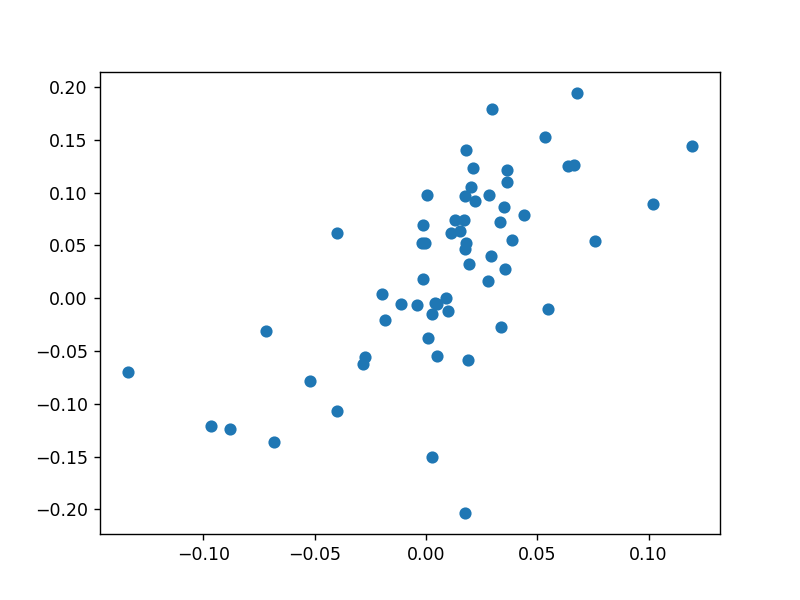

In [37]:
fig, ax = plt.subplots()
ax.scatter(X, Y)